In [90]:
import numpy as np
import pandas as pd

In [91]:
df = pd.read_csv('/content/train_v9rqX0R.csv')

In [92]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [93]:
df.shape

(8523, 12)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [95]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [96]:
import matplotlib.pyplot as plt

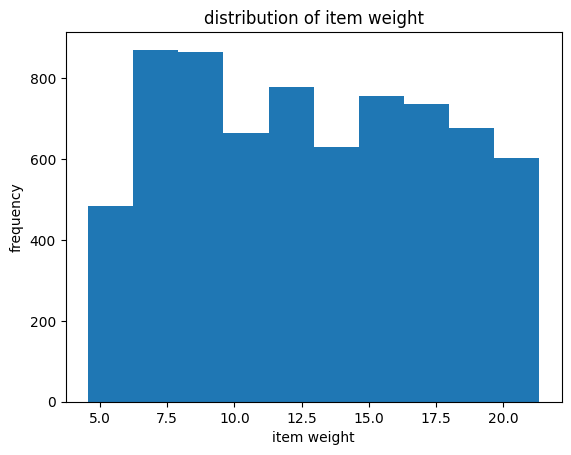

In [97]:
plt.hist(df['Item_Weight'])
plt.title("distribution of item weight")
plt.xlabel("item weight")
plt.ylabel("frequency")
plt.show()

In [98]:
mean_itemweight = df['Item_Weight'].mean()

In [99]:
from scipy.stats import skew, kurtosis

In [100]:
df['Item_Weight'].skew()

0.0824262091221237

In [101]:
df['Item_Weight'].kurt()

-1.2277664144376634

In [102]:
df['Item_Weight']= df['Item_Weight'].fillna(mean_itemweight)

In [103]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [104]:
df['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [105]:
df['Outlet_Size']= df['Outlet_Size'].fillna("Medium")

In [106]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [107]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

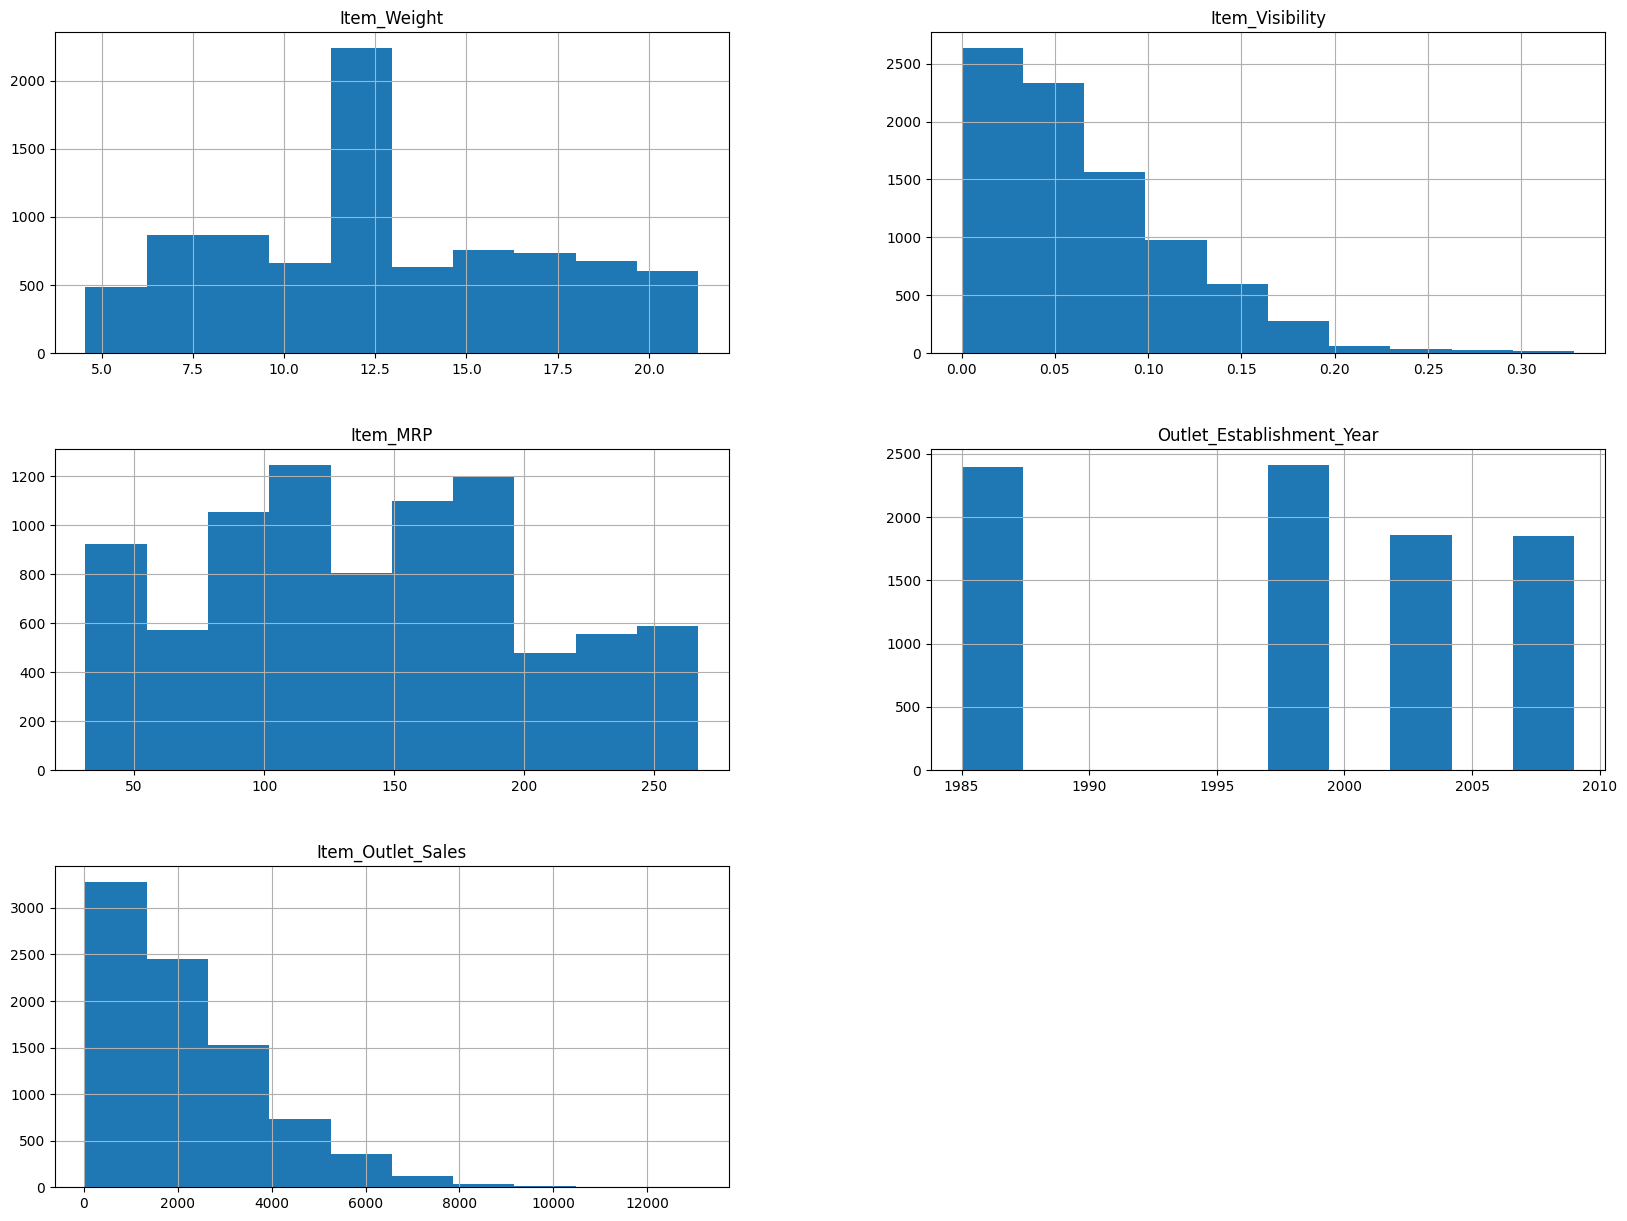

In [108]:
freqgraph = df.select_dtypes(include = ['int32','int64','float'])    ### plottting the distribution of all the data 
freqgraph.hist(figsize = (20,15))
plt.show()
     

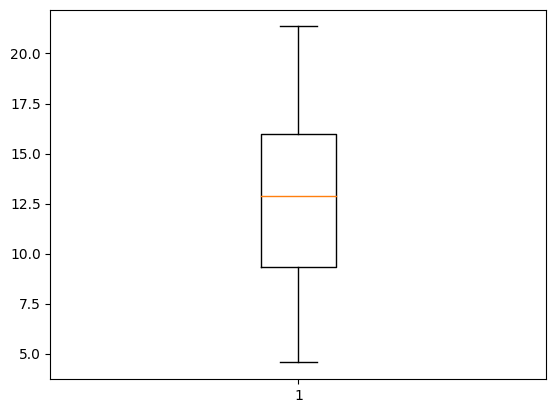

In [109]:
plt.boxplot(df['Item_Weight'])
plt.show()

In [110]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [111]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

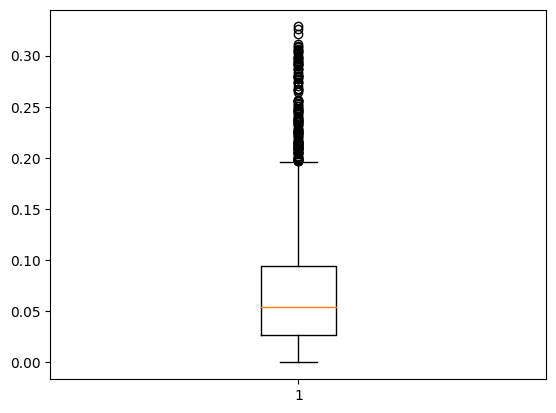

In [112]:
plt.boxplot(df['Item_Visibility'])
plt.show()

In [113]:
df['Item_Visibility'].skew()

1.1670905496918396

In [114]:
constant = 0.001
df["transformed_Item_Visibility"] = np.log(np.array(df['Item_Visibility'])+constant )

In [115]:
df['transformed_Item_Visibility'].skew()

-1.674423062036974

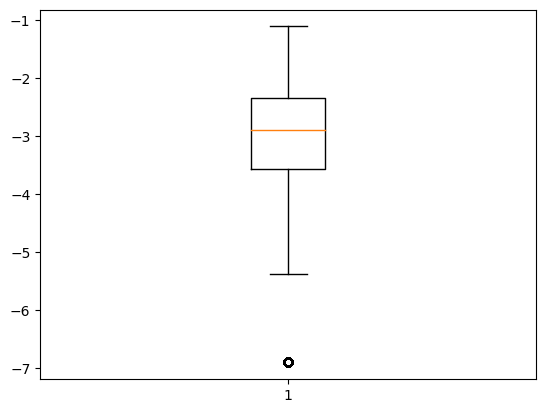

In [116]:
plt.boxplot(df['transformed_Item_Visibility'])
plt.show()

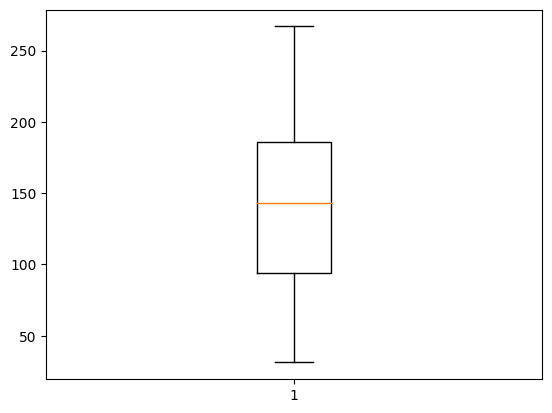

In [117]:
plt.boxplot(df['Item_MRP'])
plt.show()

In [118]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,transformed_Item_Visibility
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,-4.071763
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,-3.898208
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,-4.030802
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,-6.907755
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,-6.907755


In [119]:
### item_fat_content,item_type,outlet_size are categorical variable

In [120]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'transformed_Item_Visibility'],
      dtype='object')

In [121]:
req_col = ['Item_Weight', 'Item_Fat_Content','Item_Type', 'Item_MRP', 'Item_Visibility',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']

In [122]:
x= df[req_col]
y= df['Item_Outlet_Sales']

In [123]:
x.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Item_Visibility', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [124]:
x['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [125]:
mapping = {'Low Fat': 'LF','LF': 'LF','low fat': 'LF','Regular': 'RG','reg': 'RG'}

In [126]:
x['Item_Fat_Content']= df['Item_Fat_Content'].map(mapping)

<ipython-input-126-905a531b08bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Item_Fat_Content']= df['Item_Fat_Content'].map(mapping)


In [127]:
x['Item_Fat_Content'].value_counts()

LF    5517
RG    3006
Name: Item_Fat_Content, dtype: int64

In [128]:
### item_fat_content,item_type,outlet_size are categorical variable
### item_fat_content,outlet_size ---->>> label encoding
### item_type ---->>> one hot encoding

In [129]:
from sklearn.preprocessing import LabelEncoder
     

In [130]:
le_1 = LabelEncoder()


In [131]:
le_1.fit(x['Item_Fat_Content'])



LabelEncoder()

In [132]:
le_1.classes_ = np.array(["LF","RG"])


In [133]:
x.loc[:, ['Item_Fat_Content']] = le_1.transform(x['Item_Fat_Content'])



<ipython-input-133-922fc60a46d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:, ['Item_Fat_Content']] = le_1.transform(x['Item_Fat_Content'])
<ipython-input-133-922fc60a46d9>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:, ['Item_Fat_Content']] = le_1.transform(x['Item_Fat_Content'])


In [134]:
le_2 = LabelEncoder()
le_2.fit(x['Outlet_Size'])
le_2.classes_ = np.array(["Medium","Small","High"])
x.loc[:,'Outlet_Size'] = le_2.transform(x.loc[:,'Outlet_Size'])


<ipython-input-134-6a3ba56a770a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,'Outlet_Size'] = le_2.transform(x.loc[:,'Outlet_Size'])
<ipython-input-134-6a3ba56a770a>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,'Outlet_Size'] = le_2.transform(x.loc[:,'Outlet_Size'])


In [135]:
x= pd.get_dummies(x)

In [136]:
x.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Item_Visibility,Outlet_Establishment_Year,Outlet_Size,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,249.8092,0.016047,1999,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,1,48.2692,0.019278,2009,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0,141.6180,0.016760,1999,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,1,182.0950,0.000000,1998,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0,53.8614,0.000000,1987,2,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [137]:
x.describe()

,Item_Weight,Item_Fat_Content,Item_MRP,Item_Visibility,Outlet_Establishment_Year,Outlet_Size,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,140.992782,0.066132,1997.831867,0.498885,0.076030,0.029450,0.012906,0.076147,...,0.140795,0.052212,0.017365,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,4.226124,0.477836,62.275067,0.051598,8.371760,0.684658,0.265061,0.169073,0.112877,0.265249,...,0.347831,0.222467,0.130634,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,4.555000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,93.826500,0.026989,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.000000,143.012800,0.053931,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,1.000000,185.643700,0.094585,2004.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,1.000000,266.888400,0.328391,2009.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
from sklearn.model_selection import train_test_split 

In [139]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 32)

In [140]:
x_train.shape, y_train.shape


((6818, 29), (6818,))

In [141]:

x_test.shape, y_test.shape

((1705, 29), (1705,))

In [142]:
from sklearn.preprocessing import MinMaxScaler   ### scaling
mn = MinMaxScaler()
x_train = mn.fit_transform(x_train)
x_test = mn.fit_transform(x_test)

In [143]:
from sklearn.linear_model import LinearRegression 

In [144]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [145]:
y_pred = model.predict(x_test)

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 1294708.9544721358
Root Mean Squared Error (RMSE): 1137.8527824249215
Mean Absolute Error (MAE): 845.4235569501467
R-squared (R2): 0.5583698128576893


In [147]:
from sklearn.svm import SVR

In [148]:
svm = SVR()

In [149]:
svm.fit(x_train ,y_train)

SVR()

In [150]:
mse1 = mean_squared_error(y_test, y_pred)
rmse1 = np.sqrt(mse)
mae1 = mean_absolute_error(y_test, y_pred)
r21 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse1)
print("Root Mean Squared Error (RMSE):", rmse1)
print("Mean Absolute Error (MAE):", mae1)
print("R-squared (R2):", r21)


Mean Squared Error (MSE): 1294708.9544721358
Root Mean Squared Error (RMSE): 1137.8527824249215
Mean Absolute Error (MAE): 845.4235569501467
R-squared (R2): 0.5583698128576893


In [169]:
from sklearn.neighbors import KNeighborsRegressor

In [170]:
knr = KNeighborsRegressor(n_neighbors=6)
knr.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [171]:
y_pred = knr.predict(x_test)

In [175]:
mean_squared_error(y_test, y_pred)



1479979.1743001747

In [176]:
np.sqrt(mse)


1137.8527824249215

In [179]:
mae_knr = mean_absolute_error(y_test, y_pred)
r2core_knr= r2_score(y_test, y_pred)
print(mae_knr)
r2core_knr

873.4788351906158


0.4951734307117782

In [214]:
sv = SVR(kernel = "linear")

In [215]:
sv.fit(x_train, y_train)

SVR(kernel='linear')

In [216]:
y_pred = sv.predict(x_test)

In [228]:
sv = SVR(kernel = "poly", degree= 3)
sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)

In [239]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [240]:
y_pred = dt.predict(x_test)

In [293]:
from sklearn.ensemble import VotingRegressor
##from sklearn.neighbors import KNeighborsRegressor
##from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

estimators = [('knn', KNeighborsRegressor()),
              ('svm', SVR()),
              ('random_forest', RandomForestRegressor()),('decision_tree', DecisionTreeRegressor())]

vc = VotingRegressor(estimators=estimators)
vc.fit(x_train, y_train)


VotingRegressor(estimators=[('knn', KNeighborsRegressor()), ('svm', SVR()),
                            ('random_forest', RandomForestRegressor()),
                            ('decision_tree', DecisionTreeRegressor())])

In [294]:
y_pred = vc.predict(x_test)

In [306]:
from sklearn.ensemble import BaggingRegressor

In [307]:
dt = DecisionTreeRegressor()
bg = BaggingRegressor(estimator = dt, n_estimators= 50)
bg.fit(x_train, y_train)
y_pred = bg.predict(x_test)

In [320]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 150 , max_depth = 8, max_features = 0.8)
rf.fit(x_train,y_train)
RandomForestRegressor(max_depth=8, max_features=0.8, n_estimators=150)
y_pred = rf.predict(x_test)

In [331]:
from sklearn.ensemble import AdaBoostRegressor

In [332]:
base_regressor = DecisionTreeRegressor(max_depth=3) 

In [333]:
adaboost = AdaBoostRegressor(base_estimator=base_regressor, n_estimators=50, learning_rate=1.0)  



In [334]:
adaboost.fit(x_train, y_train)
predictions = adaboost.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [348]:
from sklearn.ensemble import GradientBoostingRegressor


In [349]:
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)



In [350]:
gradient_boosting.fit(x_train, y_train)
predictions = gradient_boosting.predict(x_test)

In [272]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [295]:
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_data.csv')

In [351]:
y_predict_test_data = dt.predict(test_data)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [352]:
y_predict_test_data


array([ 661.96843165,  964.07508088,  302.31792196, ..., 1297.28737798,
        755.18682488, 1674.23464459])

In [353]:
y_predict_test_data.shape

(5681,)

In [340]:
### df1 = pd.DataFrame(y_predict_test_data)


In [354]:
df2 = pd.read_csv('/content/test_AbJTz2l.csv')

In [355]:
df2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [356]:
z = {'Item_Identifier': df2['Item_Identifier'], 'Outlet_Identifier': df2['Outlet_Identifier']} ##'Item_Outlet_Sales':df1['y_predict_test_data']}

In [357]:
df3 = pd.DataFrame(z)

In [358]:
df3.shape

(5681, 2)

In [359]:
df3['Item_Outlet_Sales'] = y_predict_test_data

In [360]:
df3.to_csv('/content/drive/MyDrive/Colab Notebooks/output.csv', index=False)